In [2]:
import pandas as pd

df=pd.read_csv("sample_submission.csv")
df1=pd.read_csv("test_x.csv")
df2=pd.read_csv("train.csv")
df2

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,5455,Kadın,>60,Bekar,Üniversite Mezunu,Emekli,478054.247819,Köy veya Kasaba,Kozmetik,43182.299801,31.356284,Etmiyor,obek_6,51.600436
5456,5456,Erkek,51-60,Evli,Doktora Ötesi,Kendi İşinin Sahibi,481852.853651,Köy veya Kasaba,Ev ve Mobilya,42107.996193,26.288620,Etmiyor,obek_6,49.190536
5457,5457,Kadın,51-60,Evli,İlkokul Mezunu,Düzenli ve Ücretli Bir İşi Var,309443.687351,Küçük Şehir,Ev ve Mobilya,4655.392445,5.156906,Etmiyor,obek_1,9.537384
5458,5458,Kadın,18-30,Bekar,Yüksekokul Mezunu,Düzenli ve Ücretli Bir İşi Var,266604.268016,Büyük Şehir,Ev ve Mobilya,9016.165906,39.205399,Ediyor,obek_8,143.281718


In [2]:
df1.columns

Index(['index', 'Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi',
       'İstihdam Durumu', 'Yıllık Ortalama Gelir', 'Yaşadığı Şehir',
       'En Çok İlgilendiği Ürün Grubu', 'Yıllık Ortalama Satın Alım Miktarı',
       'Yıllık Ortalama Sipariş Verilen Ürün Adedi',
       'Eğitime Devam Etme Durumu',
       'Yıllık Ortalama Sepete Atılan Ürün Adedi'],
      dtype='object')

In [5]:
def analız(dataframe):
    print("************* TYPE  **************")
    print(dataframe.dtypes)
    print("************* INFO  **************")
    print(dataframe.info())
    print("************* SHAPE **************")
    print(dataframe.shape)
    print("************* NA  **************")
    print(dataframe.isnull().sum())
       
analız(df1)

************* TYPE  **************
index                                           int64
Cinsiyet                                       object
Yaş Grubu                                      object
Medeni Durum                                   object
Eğitim Düzeyi                                  object
İstihdam Durumu                                object
Yıllık Ortalama Gelir                         float64
Yaşadığı Şehir                                 object
En Çok İlgilendiği Ürün Grubu                  object
Yıllık Ortalama Satın Alım Miktarı            float64
Yıllık Ortalama Sipariş Verilen Ürün Adedi    float64
Eğitime Devam Etme Durumu                      object
Yıllık Ortalama Sepete Atılan Ürün Adedi      float64
dtype: object
************* INFO  **************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                       

In [49]:
import plotly.express as px

grouped = df2.groupby(['Cinsiyet', 'Öbek İsmi'])
grouped_size = grouped.size().unstack()

fig = px.bar(grouped_size, barmode='group')
fig.show()

In [50]:
import plotly.express as px

grouped = df2.groupby(['Yaş Grubu', 'Öbek İsmi'])
grouped_size = grouped.size().unstack()

fig = px.bar(grouped_size, barmode='group')
fig.show()

In [51]:
import plotly.express as px

grouped = df2.groupby(['Medeni Durum', 'Öbek İsmi'])
grouped_size = grouped.size().unstack()

fig = px.bar(grouped_size, barmode='group')
fig.show()

In [52]:
import plotly.express as px

grouped = df2.groupby(['İstihdam Durumu', 'Öbek İsmi'])
grouped_size = grouped.size().unstack()

fig = px.bar(grouped_size, barmode='group')
fig.show()

In [53]:
import plotly.express as px

grouped = df2.groupby(['Eğitim Düzeyi', 'Öbek İsmi'])
grouped_size = grouped.size().unstack()

fig = px.bar(grouped_size, barmode='group')
fig.show()

In [54]:
import plotly.express as px

grouped = df2.groupby(['Yaşadığı Şehir', 'Öbek İsmi'])
grouped_size = grouped.size().unstack()

fig = px.bar(grouped_size, barmode='group')
fig.show()

In [55]:
import plotly.express as px

grouped = df2.groupby(['En Çok İlgilendiği Ürün Grubu', 'Öbek İsmi'])
grouped_size = grouped.size().unstack()

fig = px.bar(grouped_size)
fig.show()

In [56]:
import plotly.express as px

grouped = df2.groupby(['Eğitime Devam Etme Durumu', 'Öbek İsmi'])
grouped_size = grouped.size().unstack()

fig = px.bar(grouped_size)
fig.show()

In [74]:
import plotly.express as px

fig = px.box(df2, x="Öbek İsmi", y="Yıllık Ortalama Gelir", color="Öbek İsmi")
fig.show()

<AxesSubplot: >

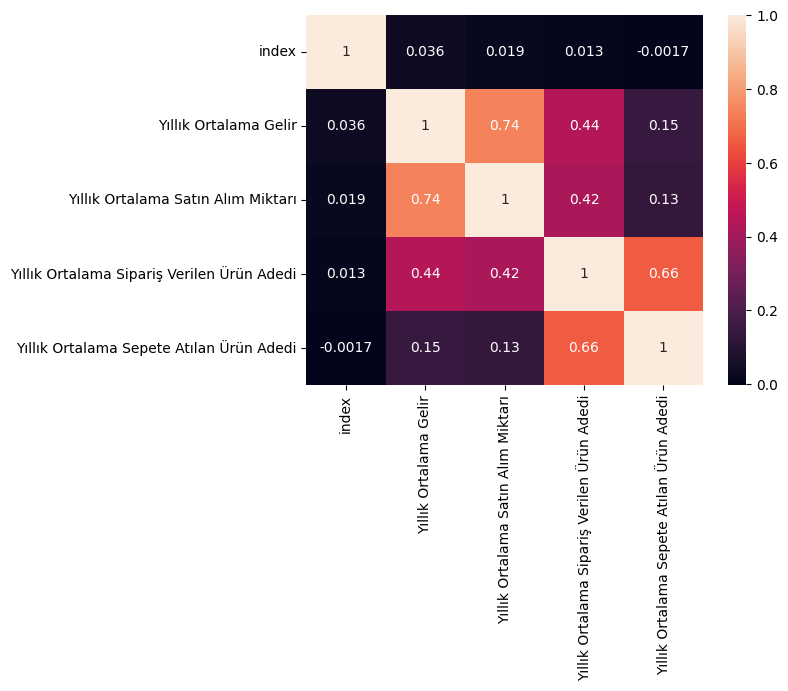

In [76]:
import seaborn as sns

sns.heatmap(df2.corr(), annot=True)

In [4]:
from sklearn.preprocessing import LabelEncoder

# List of columns with object data type
object_columns = ['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi', 'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu', 'Eğitime Devam Etme Durumu', 'Öbek İsmi']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column and transform the values
for column in object_columns:
    df2[column] = label_encoder.fit_transform(df2[column])

# Display the updated dataframe
df2.head()

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,1,1,0,5,0,748266.440879,0,0,32010.900881,37.310644,1,3,102.936904
1,1,0,4,1,3,2,246298.609605,2,4,4145.729891,11.554851,1,4,82.176053
2,2,0,0,0,3,0,268582.732360,2,2,9924.379414,55.353236,0,7,141.661426
3,3,0,3,1,3,2,327721.837865,3,2,6417.780714,15.417239,1,2,17.097397
4,4,0,1,1,4,3,397431.626948,0,2,7886.663061,14.689837,1,2,20.470459


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df2.drop('Öbek İsmi', axis=1), df2['Öbek İsmi'], test_size=0.2, random_state=42)

# Create and train a Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

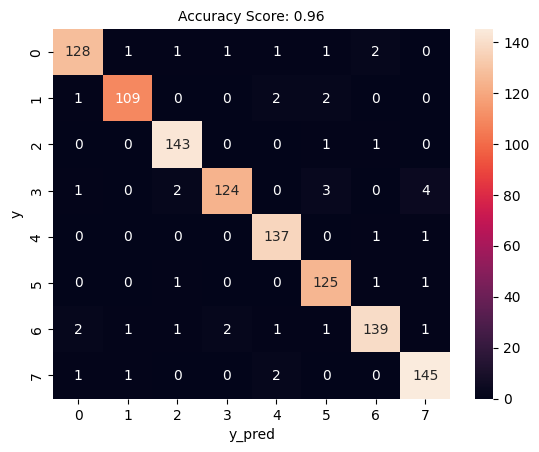

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y_test, y_pred)